Investigate the Data

Let’s start by seeing what the data looks like. Begin by loading the data into a variable named flags using Panda’s pd.read_csv() function. The function should take the name of the CSV file you want to load. In this case, our file is named "flags.csv".

We also want row 0 to be used as the header, so include the parameter header = 0.

In [18]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

flags = pd.read_csv('flags.csv', header = 0)

flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [19]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

Create Labels and Data

In [20]:
labels = flags[['Landmass']]
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles","Crosses","Saltires","Quarters","Sunstars","Crescent","Triangle"]]

Finally, let’s split these DataFrames into a training set and test set using the train_test_split() function. This function should take data and labels as parameters. Also include the parameter random_state = 1.

This function returns four values. Name those values train_data, test_data, train_labels, and test_labels in that order.

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels,random_state = 1)

In [22]:
tree = DecisionTreeClassifier(random_state=1)

In [23]:
tree.fit(train_data,train_labels)

DecisionTreeClassifier(random_state=1)

Call .score() using test_data and test_labels. Print the result.

Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time. Did our decision tree beat randomly guessing?

In [24]:
tree.score(test_data,test_labels)

0.4489795918367347

We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named i that increases from 1 to 20.

Inside your for loop, when you create tree, give it the parameter max_depth = i.

We’ll now see a printout of how the accuracy changes depending on how large we allow the tree to be.

Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

To do this, we’ll need to create a list containing all of the scores. Before the for loop, create an empty list named scores. Inside the loop, instead of printing the tree’s score, use .append() to add it to scores.

In [25]:
score = []
for i in range(1, 21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data,train_labels)
  score.append(tree.score(test_data,test_labels))

Let’s now plot our points. Call plt.plot() using two parameters. The first should be the points on the x-axis. In this case, that is range(1, 21). The second should be scores.

Then call plt.show().

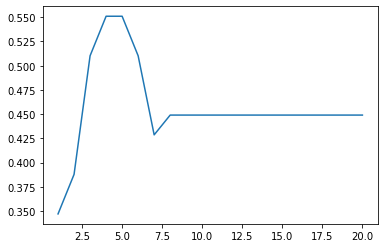

In [26]:
plt.plot(range(1,21),score)
plt.show()